# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [41]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"


# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [42]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

623

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [51]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"
# Build partial query URL
query_url = f"{url}appid={'b8147d7c19d5f5fd556e957a60a5cc12'}&units={units}&q="
query_url

response = requests.get(query_url+'new york')
json=response.json()
print(json)
json.keys()



{'coord': {'lon': -73.99, 'lat': 40.73}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 25.39, 'pressure': 1011, 'humidity': 39, 'temp_min': 23.33, 'temp_max': 27}, 'visibility': 16093, 'wind': {'speed': 3.1}, 'clouds': {'all': 1}, 'dt': 1569440197, 'sys': {'type': 1, 'id': 4610, 'message': 0.0116, 'country': 'US', 'sunrise': 1569408368, 'sunset': 1569451756}, 'timezone': -14400, 'id': 5128581, 'name': 'New York', 'cod': 200}


dict_keys(['coord', 'weather', 'base', 'main', 'visibility', 'wind', 'clouds', 'dt', 'sys', 'timezone', 'id', 'name', 'cod'])

In [44]:
temp=json["main"]["temp"]
temp1=json["main"]["humidity"]
temp3=json['wind']["speed"]
temp4=json["clouds"]["all"]

print(temp)
data = []
i = 0

for city in cities[:616]:
    
    json = requests.get(query_url + city).json()
    i=i+1
    try:
       tempmax=json["main"]['temp_max']
       humidity=json["main"]["humidity"]
       speed=json['wind']["speed"]
       cloudiness=json["clouds"]["all"]
       lat=json["coord"]["lat"]
       country=json['sys']["country"]
       date=json['dt']
       lon=json["coord"]["lon"]
       data.append([city,cloudiness,country,date,humidity,lat,lon,tempmax,speed])
#        data.append([city,temp,temp1,temp2,temp3,temp6,temp4,temp5,temp7])
       print(f"counter {i} || {city}")
       time.sleep(.1)
    except:
       print("city not found")






25.32
counter 1 || malinyi
counter 2 || kidal
city not found
city not found
counter 5 || kruisfontein
counter 6 || norman wells
counter 7 || tanout
city not found
counter 9 || atuona
city not found
counter 11 || provideniya
counter 12 || yumen
counter 13 || rikitea
counter 14 || iskateley
counter 15 || arraial do cabo
counter 16 || marsabit
counter 17 || victoria
counter 18 || klaksvik
city not found
counter 20 || okha
counter 21 || ilulissat
city not found
counter 23 || jinxi
counter 24 || georgetown
counter 25 || albany
counter 26 || cherskiy
counter 27 || carnarvon
counter 28 || baherden
counter 29 || cape town
counter 30 || huaihua
counter 31 || yellowknife
counter 32 || punta arenas
counter 33 || zwedru
counter 34 || tsiroanomandidy
counter 35 || hithadhoo
counter 36 || te anau
counter 37 || cap malheureux
city not found
counter 39 || ushuaia
city not found
counter 41 || keti bandar
counter 42 || nosy varika
counter 43 || bluff
counter 44 || billings
counter 45 || katherine
counte

counter 357 || bardoli
counter 358 || kuvandyk
counter 359 || tura
counter 360 || payo
counter 361 || le havre
counter 362 || lompoc
counter 363 || tecoanapa
city not found
counter 365 || nanortalik
counter 366 || atar
counter 367 || llanes
counter 368 || taoudenni
city not found
counter 370 || russell
counter 371 || santiago del estero
counter 372 || nipawin
counter 373 || tucuman
counter 374 || luanda
counter 375 || huilong
counter 376 || loa janan
counter 377 || goedereede
counter 378 || loukhi
city not found
counter 380 || namatanai
counter 381 || dorado
counter 382 || yaqui
counter 383 || chapleau
counter 384 || vurgun
counter 385 || birin
city not found
counter 387 || puerto leguizamo
counter 388 || port keats
counter 389 || chumikan
counter 390 || wairoa
counter 391 || pampa
counter 392 || kedrovyy
counter 393 || plaster rock
counter 394 || aleksandrov gay
counter 395 || naze
counter 396 || diamantino
counter 397 || clyde river
counter 398 || hofn
counter 399 || boa vista
counte

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [45]:
data_df=pd.DataFrame(data,columns=["City","Cloudiness","Country", "Date","Humidity","Lat","Lng","Max Temp","Wind Speed"])
data_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,malinyi,70,TZ,1569439667,53,-8.94,36.14,24.85,0.99
1,kidal,0,ML,1569439667,9,18.44,1.41,36.95,4.90
2,kruisfontein,0,ZA,1569439667,66,-34.00,24.73,12.95,5.32
3,norman wells,75,CA,1569439590,61,65.28,-126.83,8.00,7.20
4,tanout,0,NE,1569439668,10,14.97,8.88,36.75,2.94


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

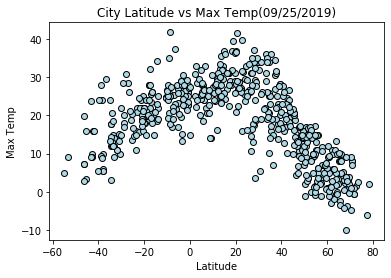

In [46]:
plt.scatter(data_df['Lat'],data_df['Max Temp'], color = 'lightblue', edgecolor = 'black')
date=time.strftime("%m/%d/%Y")
plt.title(f'City Latitude vs Max Temp({date})')
plt.ylabel('Max Temp')
plt.xlabel('Latitude')
plt.show()

#### Latitude vs. Humidity Plot

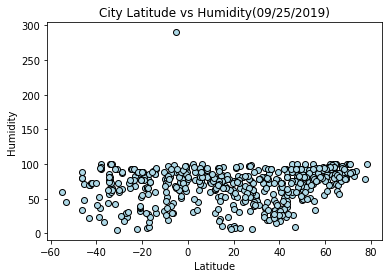

In [47]:
plt.scatter(data_df['Lat'],data_df['Humidity'], color = 'lightblue', edgecolor = 'black')
date=time.strftime("%m/%d/%Y")
plt.title(f'City Latitude vs Humidity({date})')
plt.ylabel('Humidity')
plt.xlabel('Latitude')
plt.show()

#### Latitude vs. Cloudiness Plot

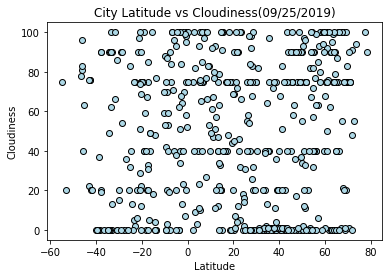

In [48]:
plt.scatter(data_df['Lat'],data_df['Cloudiness'], color = 'lightblue', edgecolor = 'black')
date=time.strftime("%m/%d/%Y")
plt.title(f'City Latitude vs Cloudiness({date})')
plt.ylabel('Cloudiness')
plt.xlabel('Latitude')
plt.show()

#### Latitude vs. Wind Speed Plot

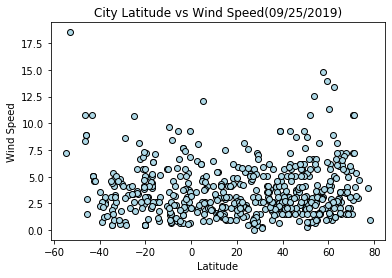

In [49]:
plt.scatter(data_df['Lat'],data_df['Wind Speed'], color = 'lightblue', edgecolor = 'black')
date=time.strftime("%m/%d/%Y")
plt.title(f'City Latitude vs Wind Speed({date})')
plt.ylabel('Wind Speed')
plt.xlabel('Latitude')
plt.show()

Observations:
    1: Temperatures increase towards 0- 20 degrees (towards the middle) and then decrease at highest and lowest latitudes
    2: There are on average more measured cities in the northern hemisphere which are colder, while the southern hemispheric cities were on average warmer
    3: Very few cities have a high wind speed over 5 mile/hour - most cities have lower wind speeds